# Echo State Network

2001年に提案されたリザバー計算の代表的なモデル．Echo State Networkは重みを固定したRNNをリザバーとして，線形学習器により予測を行うモデルです．

Echo State Networkを使えるライブラリ一覧
* https://github.com/nschaetti/EchoTorch
* https://github.com/cknd/pyESN
* https://github.com/blindedjoy/RcTorch
* https://github.com/kalekiu/easyesn

In [1]:
%%capture
!pip install rctorch
!pip install ray

In [11]:
import torch
import rctorch
from rctorch import *

0.5 7.3890560989306495
0.5 2.718281828459045
0.5 0.38674102345450123
0.5 0.36787944117144233
0.5 0.1353352832366127


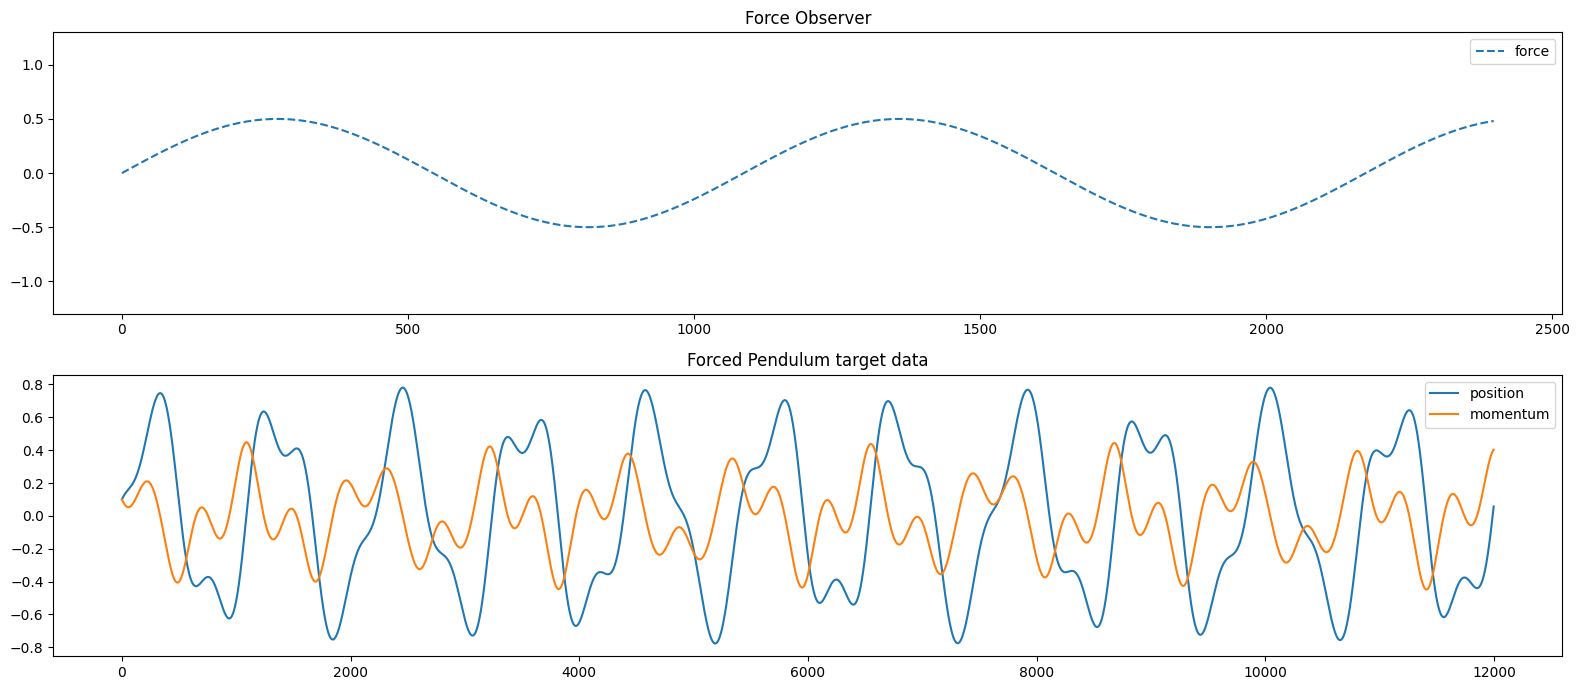

In [12]:
fp_data = rctorch.data.load("forced_pendulum", train_proportion = 0.2)

force_train, force_test = fp_data["force"]
target_train, target_test = fp_data["target"]

### Echo State Network

In [13]:
hps = {'connectivity': 0.4,
           'spectral_radius': 1.13,
           'n_nodes': 202,
           'regularization': 1.69,
           'leaking_rate': 0.0098085,
           'bias': 0.49}

/Users/tanakatouma/vscode/data-science-wiki/.venv/lib/python3.9/site-packages/rctorch/rc.py:3160: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3575.)
  input_t =  X[t, :].T


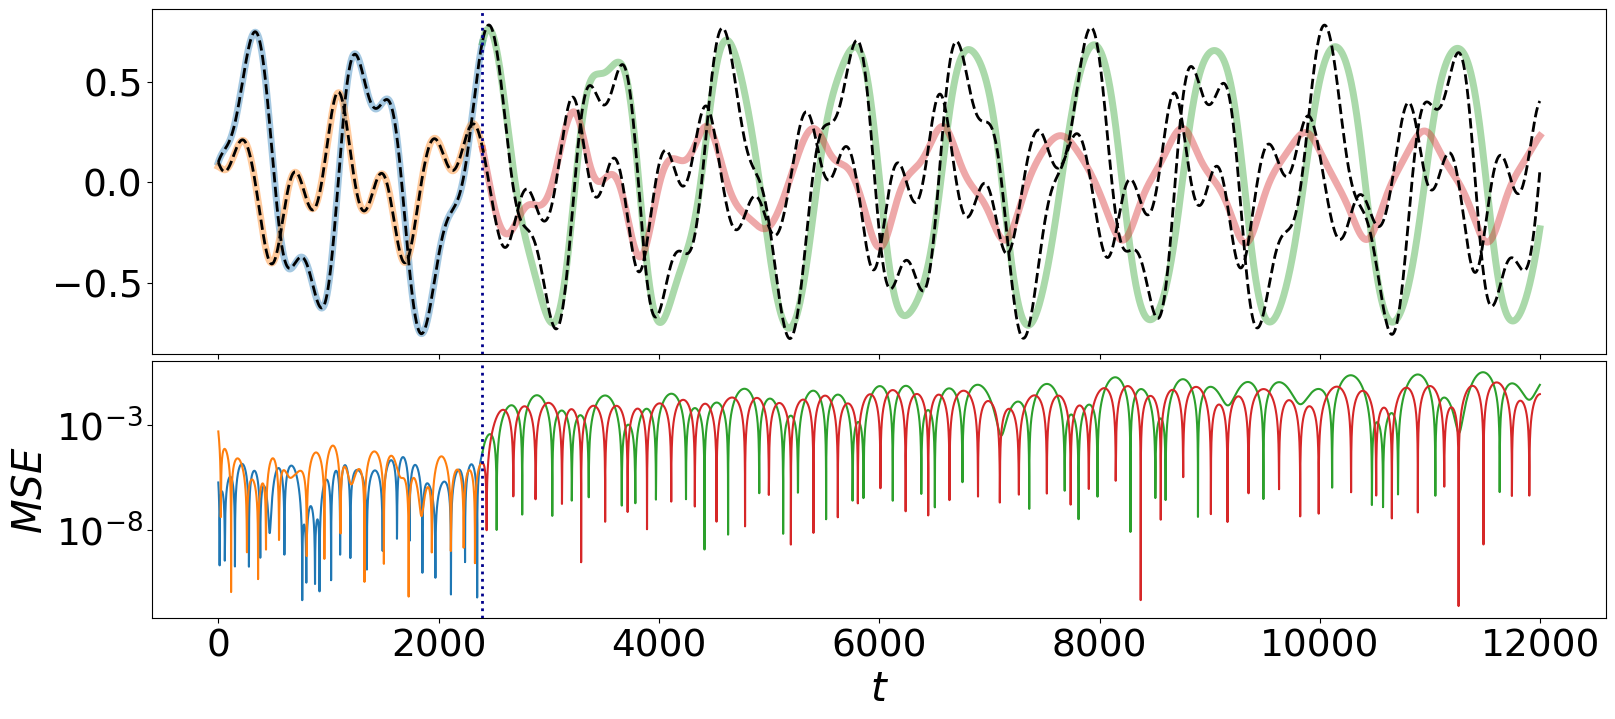

In [14]:
my_rc = RcNetwork(**hps, random_state = 210, feedback = True)

#fitting the data:
my_rc.fit(y = target_train)

#making our prediction
score, prediction = my_rc.test(y = target_test)
my_rc.combined_plot()


### オブザーバの追加

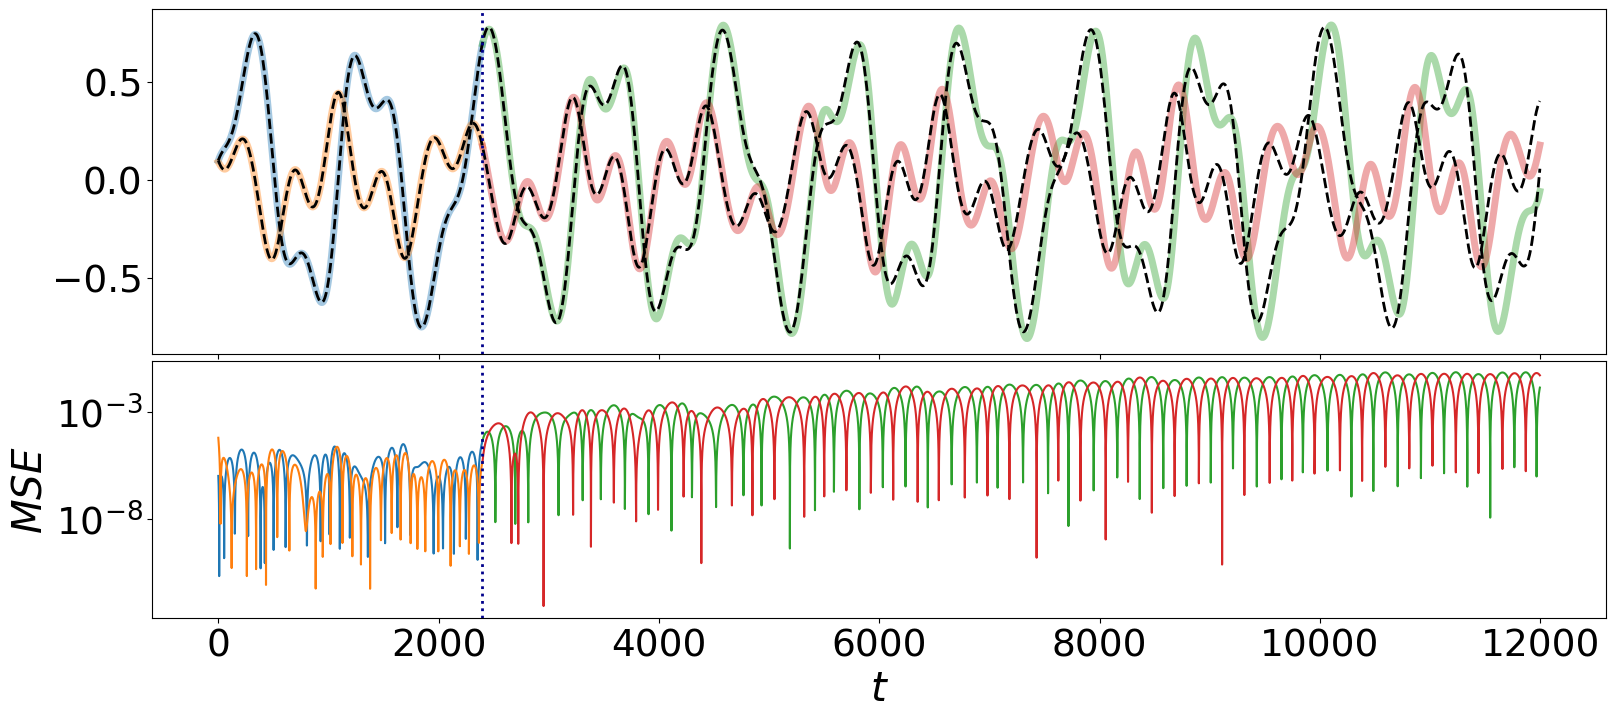

In [15]:
my_rc = RcNetwork(**hps, random_state = 210, feedback = True)

#fitting the data:
my_rc.fit(X = force_train, y = target_train)

#making our prediction
score, prediction = my_rc.test(X = force_test, y = target_test)
my_rc.combined_plot()

### ベイズ最適化によるパラメータ探索

In [17]:
bounds_dict = {"log_connectivity" : (-2.5, -0.1), 
               "spectral_radius" : (0.1, 3),
               "n_nodes" : (300,302),
               "log_regularization" : (-3, 1),
               "leaking_rate" : (0, 0.2),
               "bias": (-1,1),
               }
rc_specs = {"feedback" : True,
             "reservoir_weight_dist" : "uniform",
             "output_activation" : "tanh",
             "random_seed" : 209}

rc_bo = RcBayesOpt(bounds = bounds_dict, 
                    scoring_method = "nmse",
                    n_jobs = 1,
                    cv_samples = 3,
                    initial_samples= 25,
                    **rc_specs
                    )

cpu
